# Taller 3 -Manejo de Archivos y BioPython
## Fundamentos en Biología Computacional
## 2019-1, Prof. Javier Correa

Nota: Se calificará que el código sea lo más simple, claro, original y eficiente. No usar funciones no realizadas por ustedes mismos.

Competencias: 1. Resuelve problemas de ciencias de los datos utilizando razonamiento lógico y programación en python. 2. Manipula archivos con formatos utilizados en bioinformática para extaeer información relevante. 3. Utiliza efectivamente módulos y paquetes de python especializados para biología.

Tener en cuenta: a. desarrollar y aplicar funciones en python, b. manipular archivos (entrada y salida), c. utilizar librerias especializadas (Biopython).<br>
Ejercicio:<br>

1. Un investigador desea desarrollar un Script en python, que le permita encontrar el grupo monifilético en común entre una lista de especies de plantas (archivo adjunto: lista_mercado.tsv). La información sobre la taxonomía de cada una de las especies fue descargada de la base de datos del GenBank, luego concatenada y se encuentra en formato .gb anexo <br> 

In [1]:
%%bash
cat lista_mercado.tsv

Especie	id
Quinua	63459
Tomate	4081
Oliva	4146
Yuca	3983
Papa	4113
Repollo	3712
Lechuga	4236
Durazno	3760
Piña	4615
Coco	13894
Lenteja	3864
Arveja	3888
Berenjena	4111
Garbanzo	3827


In [1]:
%%bash
head -20 Mercado.gb

LOCUS       MG859922              122198 bp    DNA     circular PLN 30-APR-2018
DEFINITION  Pisum sativum subsp. elatius isolate CE1 chloroplast, complete
            genome.
ACCESSION   MG859922
VERSION     MG859922.1
KEYWORDS    .
SOURCE      chloroplast Pisum sativum subsp. elatius
  ORGANISM  Pisum sativum subsp. elatius
            Eukaryota; Viridiplantae; Streptophyta; Embryophyta; Tracheophyta;
            Spermatophyta; Magnoliophyta; eudicotyledons; Gunneridae;
            Pentapetalae; rosids; fabids; Fabales; Fabaceae; Papilionoideae;
            Fabeae; Pisum.
REFERENCE   1  (bases 1 to 122198)
  AUTHORS   Bogdanova,V.S., Mglinets,A.V., Shatskaya,N.V., Kosterin,O.E. and
            Vasiliev,G.V.
  TITLE     Cryptic divergences in the genus Pisum L., as revealed by
            comparative analysis of complete plastid genomes
  JOURNAL   Unpublished
REFERENCE   2  (bases 1 to 122198)
  AUTHORS   Bogdanova,V.S., Mglinets,A.V., Shatskaya,N.V., Kosterin,O.E. and


#### $\rightarrow$ Con el archivo "Mercado.gb";<br>
- A. Desarrolle un script con el cual pueda extrer la información relacionada con la taxonomía de cada especie.<br>
- B. Organice esta información en una objeto tipo lista o diccionario.<br>
- C. Cree una función que reciba el objeto anterior y compare las clasificaciones entre las diferentes especies para retornar el ancestro monofilético común más reciente a todas ellas. <br> Ejemplo: Embryophyta

In [148]:
from Bio import SeqIO
mercado = list(SeqIO.parse("Mercado.gb","gb"))
reads=[]
for read in mercado:
    reads.append(read.annotations['taxonomy'])
reads


[['Eukaryota',
  'Viridiplantae',
  'Streptophyta',
  'Embryophyta',
  'Tracheophyta',
  'Spermatophyta',
  'Magnoliophyta',
  'eudicotyledons',
  'Gunneridae',
  'Pentapetalae',
  'rosids',
  'fabids',
  'Fabales',
  'Fabaceae',
  'Papilionoideae',
  'Fabeae',
  'Pisum'],
 ['Eukaryota',
  'Viridiplantae',
  'Streptophyta',
  'Embryophyta',
  'Tracheophyta',
  'Spermatophyta',
  'Magnoliophyta',
  'eudicotyledons',
  'Gunneridae',
  'Pentapetalae',
  'asterids',
  'lamiids',
  'Solanales',
  'Solanaceae',
  'Solanoideae',
  'Solaneae',
  'Solanum'],
 ['Eukaryota',
  'Viridiplantae',
  'Streptophyta',
  'Embryophyta',
  'Tracheophyta',
  'Spermatophyta',
  'Magnoliophyta',
  'Liliopsida',
  'Arecaceae',
  'Arecoideae',
  'Cocoseae',
  'Attaleinae',
  'Cocos'],
 ['Eukaryota',
  'Viridiplantae',
  'Streptophyta',
  'Embryophyta',
  'Tracheophyta',
  'Spermatophyta',
  'Magnoliophyta',
  'eudicotyledons',
  'Gunneridae',
  'Pentapetalae',
  'rosids',
  'fabids',
  'Rosales',
  'Rosaceae',


In [152]:
def ancestroinmediato (ind): 
    a=0; b=0; c=0
    while a<12: 
        if c==1: 
            break
        compare=ind[0][a] 
        b=0
        while b<14:  
            if compare!=ind[b][a]: 
                ancestro=str(ind[0][a-1])
                c=1
            b+=1
        a+=1
    return ancestro



In [154]:
ancestroinmediato (reads)

'Magnoliophyta'

2 . El mismo investigador está ahora interesado en hacer una caracterización funcional de los genomas de los cloroplastos que poseen estas especies. Para esto y continuando con el archivo del punto anterior (Mercado.gb), resuelva las siguientes preguntas:

- A. Una forma de diferenciar una especie de otra es a través de la estimación del contenido de Guaninas y Citosinas en los genomas. Utilizando funciones de biopython responder; ¿Cuales son los valores de %GC para cada especie? retorne un diccionario con las especies como llave y su respectivo valor de %GC. Consulte el diccionario y muestre ¿Qué especie presenta el mayor %GC? ¿Y cual el más bajo? Represente los resultados en un dendograma donde se relacione las proximidades en los contenidos de %GC (puede usar Ploty, numpy, etc).

- B. Otra forma de caracterizar los genomas es estimando la frecuencia con las que aparecen los codones en los genes codificantes. Usando biopython hacer una función que me extraiga los genes codificantes para cada genoma del cloroplasto del archivo .gb, definir una función que me permita estimar la frecuencia de cada uno de los codones usados por la célula. Con las herramientas anteriores y usando funciones accesorias grafique la frecuencia de estos codones versus el codón encontrado para cada una de las especies. Finalmente, responda: ¿Qué especie presenta el codón más inusual? ¿Qué aminoácido es el mas prevalente y menos prevalente?



In [184]:
from Bio import SeqIO
from Bio.SeqUtils import GC
import sys

gb_file = sys.argv[1]

for record in SeqIO.parse("Mercado.gb", "genbank"):
    print(record.annotations['organism'] + '   GC:' + str(GC(record.seq)))

Pisum sativum subsp. elatius   GC:34.83117563298908
Solanum melongena var. insanum   GC:37.710355466992354
Cocos nucifera   GC:37.4382835724441
Prunus persica   GC:36.759617212751124
Cicer arietinum   GC:33.90627119590804
Lactuca sativa   GC:37.54942005079465
Lens culinaris   GC:34.42549627135735
Olea europaea subsp. laperrinei   GC:37.81224741156999
Solanum tuberosum   GC:37.87344184609045
Ananas comosus   GC:37.37314891377885
Chenopodium quinoa   GC:37.243747064543655
Brassica oleracea var. capitata   GC:36.36138387908663
Solanum lycopersicum   GC:37.86184803026014
Manihot esculenta   GC:35.87297851387091


In [100]:
dic={"Pisum sativum subsp. elatius":"GC:34.83117563298908",
     "Solanum melongena var. insanum":"GC:37.710355466992354",
     "Cocos nucifera":"GC:37.4382835724441",
     "Prunus persica":"GC:36.759617212751124",
     "Cicer arietinum":"GC:33.90627119590804","Lactuca sativa":"GC:37.54942005079465",
     "Lens culinaris":"GC:34.42549627135735",
     "Olea europaea subsp. laperrinei":"GC:37.81224741156999",
     "Solanum tuberosum":"GC:37.87344184609045",
     "Ananas comosus":"GC:37.37314891377885",
     "Chenopodium quinoa":"GC:37.243747064543655",
     "Brassica oleracea var. capitata":"GC:36.36138387908663",
     "Solanum lycopersicum":"GC:37.86184803026014",
     "Manihot esculenta":"GC:35.87297851387091"}
print (dic)



{'Pisum sativum subsp. elatius': 'GC:34.83117563298908', 'Solanum melongena var. insanum': 'GC:37.710355466992354', 'Cocos nucifera': 'GC:37.4382835724441', 'Prunus persica': 'GC:36.759617212751124', 'Cicer arietinum': 'GC:33.90627119590804', 'Lactuca sativa': 'GC:37.54942005079465', 'Lens culinaris': 'GC:34.42549627135735', 'Olea europaea subsp. laperrinei': 'GC:37.81224741156999', 'Solanum tuberosum': 'GC:37.87344184609045', 'Ananas comosus': 'GC:37.37314891377885', 'Chenopodium quinoa': 'GC:37.243747064543655', 'Brassica oleracea var. capitata': 'GC:36.36138387908663', 'Solanum lycopersicum': 'GC:37.86184803026014', 'Manihot esculenta': 'GC:35.87297851387091'}


In [108]:
print (dic.get("Solanum tuberosum"))#Devuelve el mayor del diccionario.
print (dic.get("Cicer arietinum"))#Devuelve el menor 





GC:37.87344184609045
GC:33.90627119590804


In [156]:


from Bio import SeqIO

fname = 'lista_mercado.tsv'
f = open(fname, 'r')
f1 = f.readlines()
lmerc = []
for i in range(0, len(f1)):
    lmerc.append(f1[i])

lmerc = lmerc[1::]
lmerc

data = SeqIO.parse("Mercado.gb", "genbank")
reads = []
for r in data:
    reads.append(r)





In [157]:
from Bio.Seq import Seq
from Bio import SeqUtils



In [161]:
for r in range(0, len(reads)):
    sec = reads[r].seq
    conGC = SeqUtils.GC(sec)
    porGC.append(conGC)
    
diccionario = dict(zip(lmerc, porGC))


print('mayor: ' + str(max([i for i in diccionario.values()])))
print('menor: ' + str(min([i for i in diccionario.values()])))

mayor: 37.87344184609045
menor: 33.90627119590804


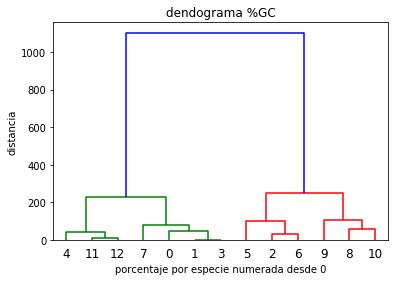

In [182]:
import numpy as np      #Importo las librerías correspondientes
import matplotlib.pyplot as plt
import pandas as pd
#Dar la base de datos luego de hacer en un archivo a parte de excel separado por comas
dataset = pd.read_csv('datos.csv')
X = dataset.iloc[:, [1]].values
#importo y configuro los valores del dendograma
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('dendograma %GC')
plt.xlabel('porcentaje por especie numerada desde 0') #son 13 especies
plt.ylabel('distancia')
plt.show()

















NameError: name 'Bio' is not defined